In [63]:
#3 sorting algroithms

def bubblesort(A):
    n = len(A)
    for i in range(n):
        swapped = False
        for j in range(0,n-i-1):
            if A[j] > A[j+1]:
                A[j],A[j+1] = A[j+1],A[j]
                swapped = True
        if swapped == False: break
    return A

def insertionsort(A):
    for i in range(0,len(A)-1):
        if A[i] > A[i+1]:
            insert = i+1
            for j in range(0,i+1):
                if A[insert] < A[i-j]:
                    A[insert],A[i-j] = A[i-j],A[insert]
                    insert = i-j
    return A

def selectionsort(A):
    for i in range(0,len(A)):
        largest_index = 0
        for j in range(0,len(A)-i):
            if A[j] > A[largest_index]: largest_index = j
        A[len(A)-i-1],A[largest_index] = A[largest_index], A[len(A)-i-1]
    return A

In [64]:
import numpy as np
from matplotlib import pyplot as plt
from time import perf_counter

In [65]:
# helper functions

def is_sorted(A):
    for i in range(0,len(A)-2):
        if A[i] > A[i+1]:
            return False
    return True

def check_validity(func):
    rng = np.random.default_rng()
    for i in range(100,400,10):
        ints = rng.integers(0,1000,i)
        if not is_sorted(func(list(ints))):
            return False
    return True


In [66]:
print("Bubblsort works") if check_validity(bubblesort) else print("Bubblesort failed")
print("Insertionsor works") if check_validity(insertionsort) else print("Insertionsort failed")
print("Selectionsort works") if check_validity(selectionsort) else print("Selectionsort failed")

Bubblsort works
Insertionsor works
Selectionsort works


In [67]:
def compare_times(*algos,max_size = 400):
    rng = np.random.default_rng()
    fig, ax = plt.subplots()
    x_axis = range(10,max_size,10)
    ax.set_title("Runtimes comparison")
    ax.set_xlabel("List size")
    ax.set_ylabel("Runtime in seconds")
    for algo in algos:
        times = []
        for size in range(10,max_size,10):
            int_list = rng.integers(0,1000,size)

            start = perf_counter()
            algo(list(int_list))
            end = perf_counter()
            times.append(end-start)
        
        ax.plot(x_axis, times, label = f"{algo.__name__}")
    ax.legend()
    plt.show()

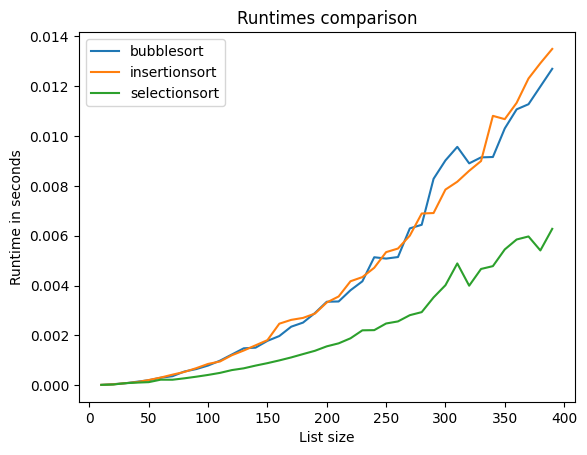

In [68]:
compare_times(bubblesort,insertionsort,selectionsort)

In [69]:
def compare_worst(*algos,max_size = 400,trials = 100):
    rng = np.random.default_rng()
    fig, ax = plt.subplots()
    x_axis = range(10,max_size,10)
    ax.set_title("Worst Runtimes comparison")
    ax.set_xlabel("List size")
    ax.set_ylabel("Runtime in seconds")
    for algo in algos:
        times = []
        for size in range(10,max_size,10):
            worst_time = 0
            for i in range(0,trials):
                int_list = rng.integers(0,1000,size)

                start = perf_counter()
                algo(list(int_list))
                end = perf_counter()

                if worst_time < (end-start): worst_time = (end-start)
            times.append(worst_time)
        
        ax.plot(x_axis, times, label = f"{algo.__name__}")
    ax.legend()
    plt.show()

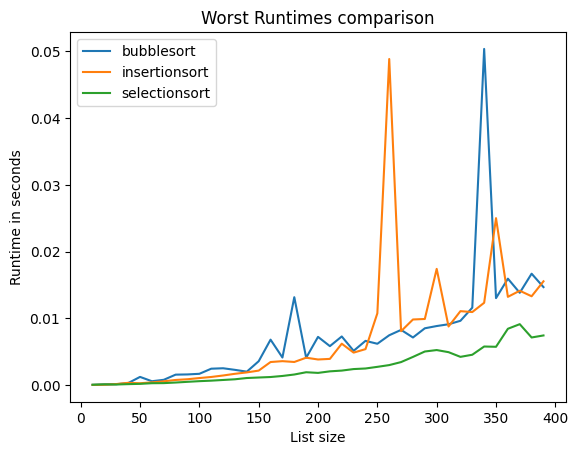

In [70]:
compare_worst(bubblesort,insertionsort,selectionsort)

In [71]:
def compare_average(*algos,max_size = 400,trials = 100):
    rng = np.random.default_rng()
    fig, ax = plt.subplots()
    x_axis = range(10,max_size,10)
    ax.set_title("Average Runtimes comparison")
    ax.set_xlabel("List size")
    ax.set_ylabel("Runtime in seconds")
    for algo in algos:
        times = []
        for size in range(10,max_size,10):
            time = 0
            for i in range(0,trials):
                int_list = rng.integers(0,1000,size)

                start = perf_counter()
                algo(list(int_list))
                end = perf_counter()

                time += (end-start)
            times.append(time/trials)
    
        ax.plot(x_axis, times, label = f"{algo.__name__}")
    ax.legend()
    plt.show()

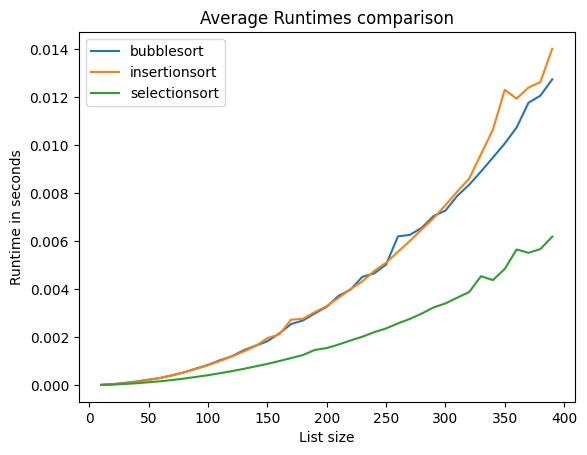

In [72]:
compare_average(bubblesort,insertionsort,selectionsort)

In [73]:
def compare_best(*algos,max_size = 400,trials = 100):
    rng = np.random.default_rng()
    fig, ax = plt.subplots()
    x_axis = range(10,max_size,10)
    ax.set_title("Best Runtimes comparison")
    ax.set_xlabel("List size")
    ax.set_ylabel("Runtime in seconds")
    for algo in algos:
        times = []
        for size in range(10,max_size,10):
            best_time = 100
            for i in range(0,trials):
                int_list = rng.integers(0,1000,size)

                start = perf_counter()
                algo(list(int_list))
                end = perf_counter()

                if (end-start) < best_time: best_time = (end-start)
            times.append(best_time)
    
        ax.plot(x_axis, times, label = f"{algo.__name__}")
    ax.legend()
    plt.show()

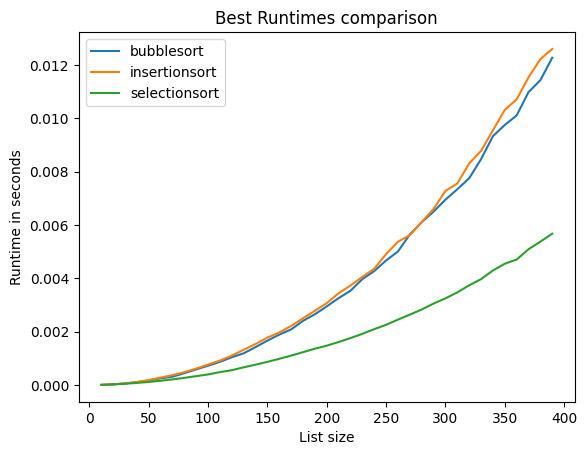

In [74]:
compare_best(bubblesort,insertionsort,selectionsort)

In [75]:
def compare_best(*algos,max_size = 400,trials = 100):
    rng = np.random.default_rng()
    fig, ax = plt.subplots()
    x_axis = range(10,max_size,10)
    ax.set_title("Best Runtimes comparison")
    ax.set_xlabel("List size")
    ax.set_ylabel("Runtime in seconds")
    for algo in algos:
        times = []
        for size in range(10,max_size,10):
            best_time = 100
            for i in range(0,trials):
                int_list = rng.integers(0,1000,size)
                int_list = sorted(int_list)
                start = perf_counter()
                algo(list(int_list))
                end = perf_counter()

                if (end-start) < best_time: best_time = (end-start)
            times.append(best_time)
    
        ax.plot(x_axis, times, label = f"{algo.__name__}")
    ax.legend()
    plt.show()

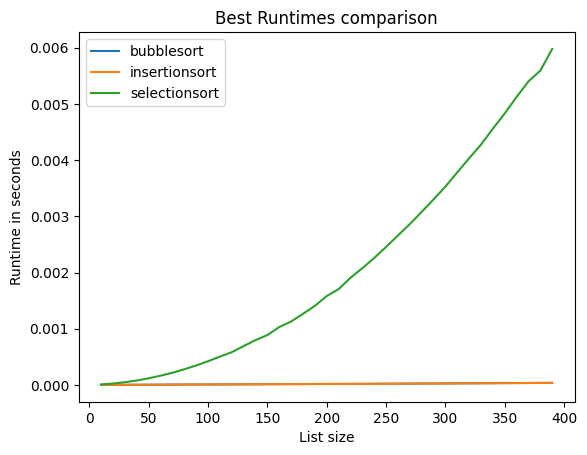

In [76]:
compare_best(bubblesort,insertionsort,selectionsort)

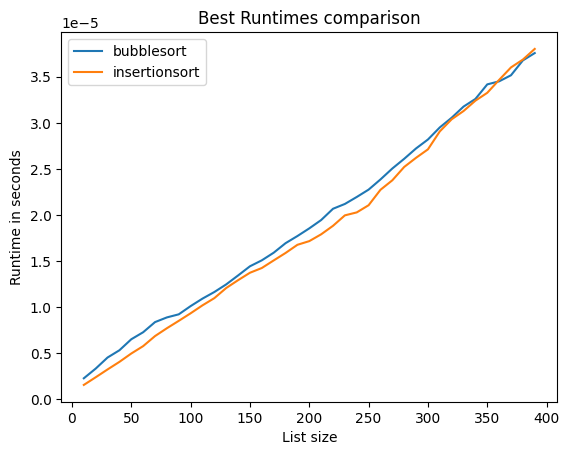

In [77]:
compare_best(bubblesort,insertionsort)

In [78]:
def make_sorta_sorted(n, mess_factor):
    rng = np.random.default_rng()
    A = sorted(rng.integers(1,1000,n))
    percent = int((mess_factor * n) // 2)
    for i in range(percent):
        j_1, j_2 = rng.integers(0,n,2)
        A[j_1], A[j_2] = A[j_2], A[j_1]
    return A

In [85]:
def compare_adaptive(*algos,max_size = 400,trials = 100):
    rng = np.random.default_rng()
    fig, ax = plt.subplots()
    x_axis = range(10,max_size,10)
    ax.set_title("Best Runtimes comparison on partially sorted lists")
    ax.set_xlabel("List size")
    ax.set_ylabel("Runtime in seconds")
    for algo in algos:
        times = []
        for size in range(10,max_size,10):
            best_time = 100
            for i in range(0,trials):
                int_list = make_sorta_sorted(size,0.2)
                start = perf_counter()
                algo(list(int_list))
                end = perf_counter()

                if (end-start) < best_time: best_time = (end-start)
            times.append(best_time)
    
        ax.plot(x_axis, times, label = f"{algo.__name__}")
    ax.legend()
    plt.show()

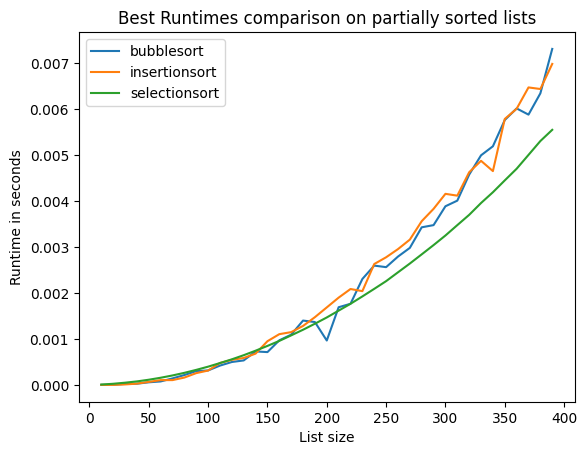

In [86]:
compare_adaptive(bubblesort,insertionsort,selectionsort)

In [88]:
def compare_with_theory(algo,theory, resolution = 1, max_size = 500):
    rng = np.random.default_rng()
    times = []
    for size in range(10,max_size,10):
        time = 0
        for _ in range(0,resolution):
            int_list = rng.integers(0,1000,size)

            start = perf_counter()
            algo(list(int_list))
            end = perf_counter()

            time += (end-start)
        times.append(time/resolution)
    
    x_axis = range(10,max_size,10)
    theo_vals = [theory(i) for i in x_axis]
    fix, ax = plt.subplots(1,2,figsize=(10,4)) # this creates a 1x2 grid of Axes
    ax[0].set_title(f"{str(algo.__name__)} runtimes")
    ax[0].set_xlabel("Array size")
    ax[0].set_ylabel("Runtime in seconds")
    ax[0].plot(x_axis, times)
    ax[1].set_title("Theoretical big-O function:")
    ax[1].set_xlabel(f"Input size n")
    ax[1].plot(x_axis, theo_vals)
    plt.tight_layout()
    plt.show()

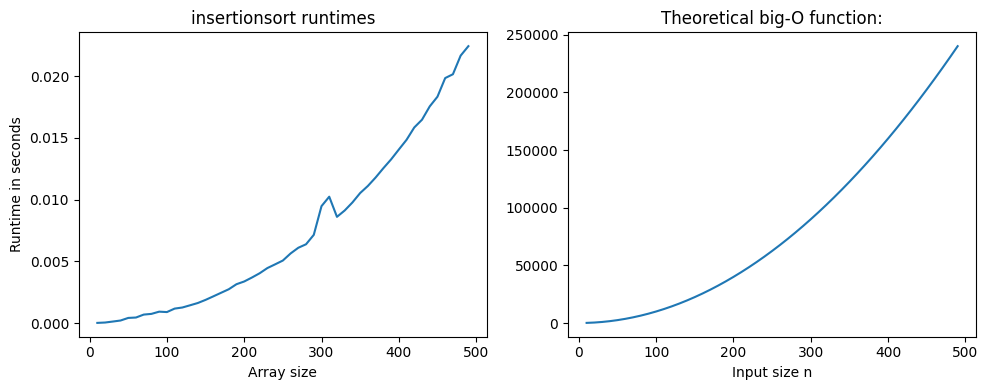

In [91]:
compare_with_theory(insertionsort,lambda n:n*n, resolution=10)